In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
df = pd.read_csv("quora.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### Wordcloud distribution to see the most frequent words used throughout the entire dataset

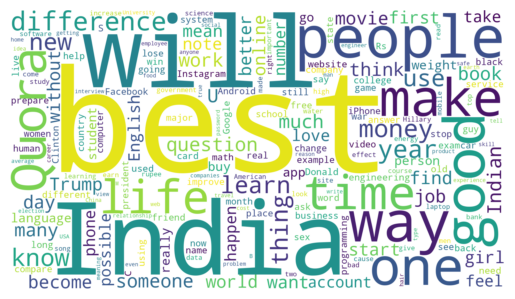

In [4]:
text = df.question1 + df.question2

wc_text = " ".join(word for word in text.astype(str))

word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(wc_text)
# saving the image
word_cloud.to_file('quora_wordcloud.png')

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Examples of Duplicate Questions

In [5]:
print("Examples of Duplicate questions: \n")
print("="*70)
print("\n")
for _, row in df[df['is_duplicate'] == 1].head(2).iterrows():
    print(f"Q1: {row['question1']}")
    print(f"Q2: {row['question2']}")
    print("\n")

print("Examples of Non-Duplicate questions: \n")
print("="*70)
print("\n")
for _, row in df[df['is_duplicate'] == 0].head(2).iterrows():
    print(f"Q1: {row['question1']}")
    print(f"Q2: {row['question2']}")
    print("\n")

Examples of Duplicate questions: 



Q1: Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
Q2: I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?


Q1: How can I be a good geologist?
Q2: What should I do to be a great geologist?


Examples of Non-Duplicate questions: 



Q1: What is the step by step guide to invest in share market in india?
Q2: What is the step by step guide to invest in share market?


Q1: What is the story of Kohinoor (Koh-i-Noor) Diamond?
Q2: What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?




### Null values, which will be removed during cleaning

In [6]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

### Distribution of similar and dissimilar questions in the dataset

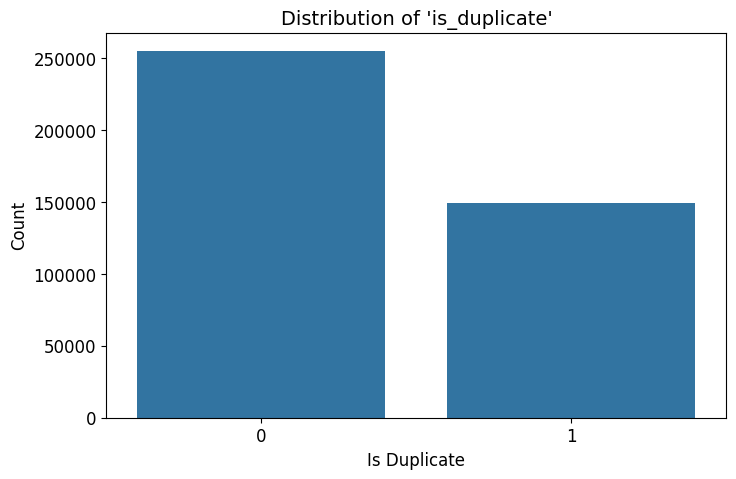

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
bar_plot = sns.barplot(
    x='is_duplicate',
    y='count',
    data=df['is_duplicate'].value_counts().reset_index(),
    ax=ax
)

ax.set_title("Distribution of 'is_duplicate'", fontsize=14)
ax.set_xlabel('Is Duplicate', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='both', labelsize=12)

# plt.tight_layout()

plt.show()

In [9]:
new_df = df.drop(['id', 'qid1', 'qid2'], axis=1)
new_df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
